# Demonstrating the Wolfson Bipolarization Coefficient:

The Wolfson Polarization Index, introduced by Wolfson (1994), is a measure used to quantify the degree of bipolarization within a distribution, particularly income distributions. Unlike traditional inequality measures, such as the Gini coefficient, which capture the overall level of inequality within a distribution, the Wolfson index specifically focuses on the extent to which a distribution exhibits characteristics of bipolarization. This means it is sensitive to the presence of two distinct groups or "poles" in the distribution, which can signal social or economic divisions.

Bipolarization occurs when the population tends to cluster around two income poles, resulting in a “hollowing out” of the middle class. This phenomenon has been observed in many advanced economies where growing income inequality is not just due to the rich getting richer and the poor getting poorer, but also due to the diminishing size of the middle-income group.

The Wolfson index is defined mathematically in terms of the Lorenz curve, but it differs from traditional Lorenz-based indices (like the Gini coefficient) by its focus on the distance between the poles of a distribution. The index increases as the distribution becomes more polarized, which happens when the middle of the distribution thins out while the lower and upper ends of the distribution expand.

Wolfson’s work (1994) has been foundational in the field of inequality measurement, offering new insights into the nature of economic divisions beyond what is captured by measures like variance or Gini. By applying the Wolfson index to different income distributions, analysts can better understand the dynamics of income segmentation and social stratification within a population.


Wolfson, M. C. (1994). When Inequalities Diverge. The American Economic Review, 84(2), 353-358.

-------------------------

### 1. Imports & Input Data

In [1]:
from inequality.wolfson import wolfson


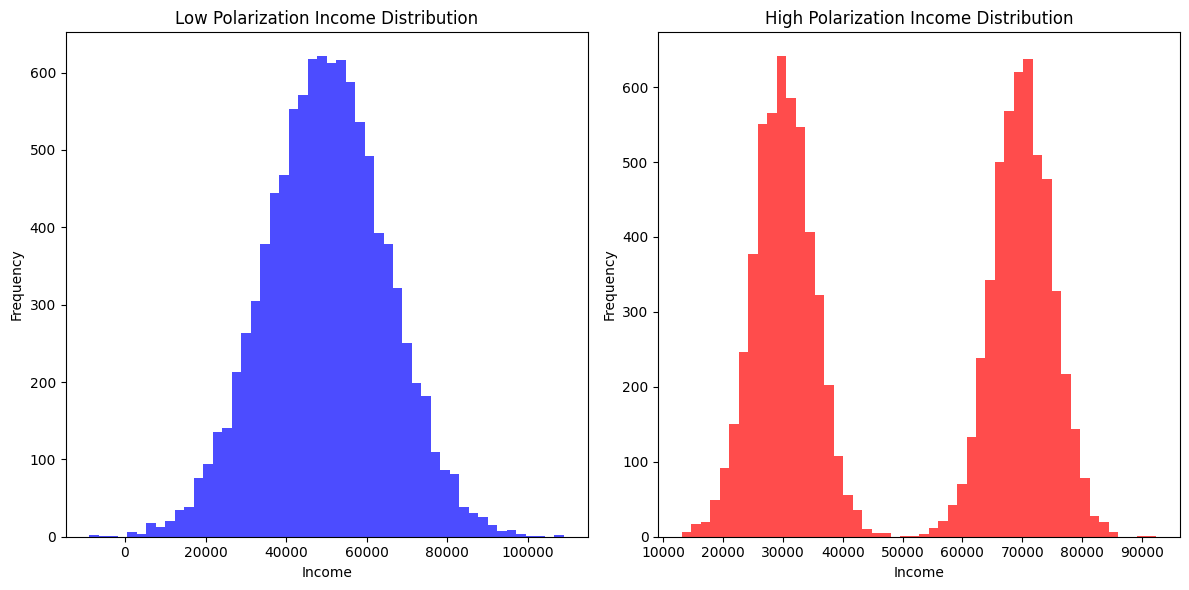

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Set random seed for reproducibility
np.random.seed(42)

# Distribution 1: Low polarization (normal distribution)
income_low_polarization = np.random.normal(loc=50000, scale=15000, size=10000)

# Distribution 2: High polarization (bimodal distribution)
income_high_polarization = np.concatenate([
    np.random.normal(loc=30000, scale=5000, size=5000),
    np.random.normal(loc=70000, scale=5000, size=5000)
])

# Plotting the distributions
plt.figure(figsize=(12, 6))

# Plot for low polarization
plt.subplot(1, 2, 1)
plt.hist(income_low_polarization, bins=50, color='blue', alpha=0.7)
plt.title('Low Polarization Income Distribution')
plt.xlabel('Income')
plt.ylabel('Frequency')

# Plot for high polarization
plt.subplot(1, 2, 2)
plt.hist(income_high_polarization, bins=50, color='red', alpha=0.7)
plt.title('High Polarization Income Distribution')
plt.xlabel('Income')
plt.ylabel('Frequency')

# Show plots
plt.tight_layout()
plt.show()


In [3]:
wolfson(income_high_polarization)

np.float64(0.17571224182763848)

In [4]:
wolfson(income_low_polarization)

np.float64(0.07016937981819878)

In [5]:
import libpysal
import geopandas
pth = libpysal.examples.get_path("mexicojoin.shp")
gdf = geopandas.read_file(pth)

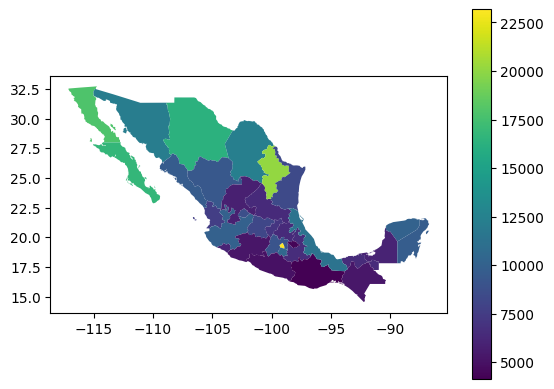

In [6]:
gdf.plot(column='PCGDP1960', legend=True);

(array([8., 6., 7., 4., 2., 0., 2., 1., 1., 1.]),
 array([ 4140. ,  6043.4,  7946.8,  9850.2, 11753.6, 13657. , 15560.4,
        17463.8, 19367.2, 21270.6, 23174. ]),
 <BarContainer object of 10 artists>)

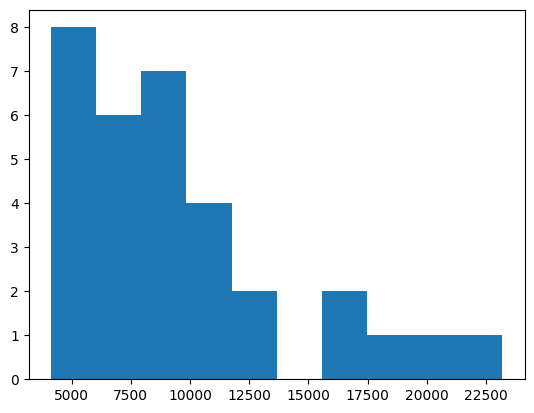

In [7]:
plt.hist(gdf.PCGDP1960)

In [8]:
wolfson(gdf.PCGDP1960)

np.float64(0.11070986960431652)

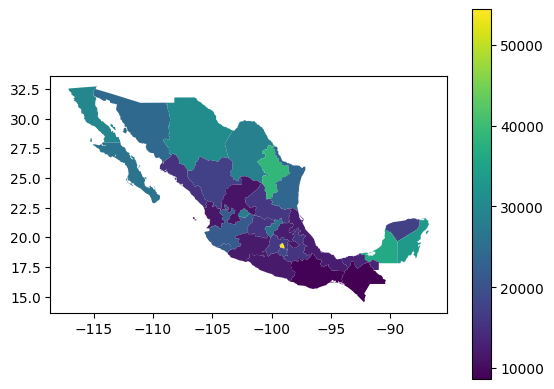

In [9]:
gdf.plot(column='PCGDP2000', legend=True);

(array([9., 8., 3., 4., 4., 1., 2., 0., 0., 1.]),
 array([ 8684. , 13250.5, 17817. , 22383.5, 26950. , 31516.5, 36083. ,
        40649.5, 45216. , 49782.5, 54349. ]),
 <BarContainer object of 10 artists>)

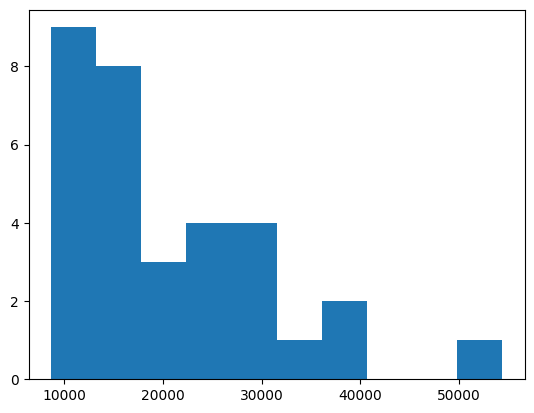

In [10]:
plt.hist(gdf.PCGDP2000)

In [11]:
wolfson(gdf.PCGDP2000)

np.float64(0.13617347834498972)

In [12]:
years = range(1940, 2010, 10)
w = [wolfson(gdf[f"PCGDP{year}"]) for year in years]

In [13]:
import pandas 

In [14]:
ts = pandas.DataFrame(data=years, columns=['year'])

In [15]:
ts['wolfson'] = w
ts = ts.set_index('year')

<Axes: xlabel='year'>

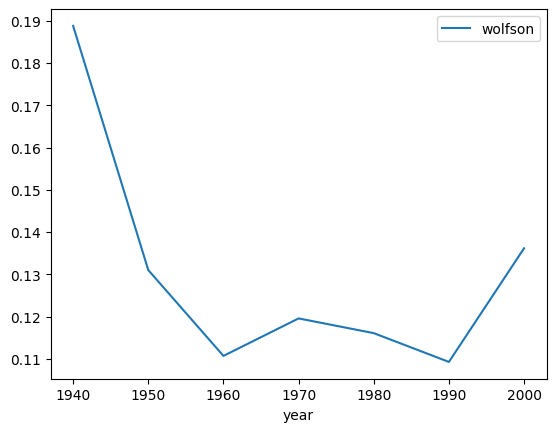

In [16]:
ts.plot()